In [19]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city = pd.read_csv(city_data_to_load)
ride = pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset
data = pd.merge(ride,city,on="city")

# Display the data table for preview
data.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,Lake Jonathanshire,2018-04-07 20:51:11,31.25,4441251834598,5,Urban
2,Lake Jonathanshire,2018-03-09 23:45:55,19.89,2389495660448,5,Urban
3,Lake Jonathanshire,2018-04-07 18:09:21,24.28,7796805191168,5,Urban
4,Lake Jonathanshire,2018-01-02 14:14:50,13.89,424254840012,5,Urban


## Bubble Plot of Ride Sharing Data

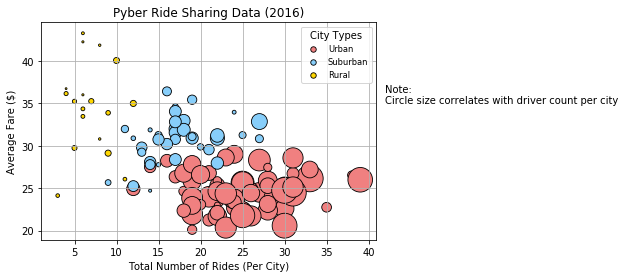

In [25]:
urban = data.loc[data["type"] == "Urban"]
suburban = data.loc[data["type"] == "Suburban"]
rural = data.loc[data["type"] == "Rural"]

#Urban Details
urban_city_group = urban.groupby("city")
urban_average_fare = urban_city_group.fare.mean()
urban_total_rides = urban_city_group.date.count()
urban_total_drivers = urban_city_group.driver_count.sum()


#suburban Details
suburban_city_group = suburban.groupby("city")
suburban_average_fare = suburban_city_group.fare.mean()
suburban_total_rides = suburban_city_group.date.count()
suburban_total_drivers = suburban_city_group.driver_count.sum()



#Rural Details
rural_city_group = rural.groupby("city")
rural_average_fare = rural_city_group.fare.mean()
rural_total_rides = rural_city_group.date.count()
rural_total_drivers = rural_city_group.driver_count.sum()


# Build the scatter plots for each city types
urban = plt.scatter(urban_total_rides, urban_average_fare, marker="o", c="LightCoral", edgecolors="black",
            s=urban_total_drivers**0.85,linewidths=0.85,alpha = 1)
sub = plt.scatter(suburban_total_rides, suburban_average_fare, marker="o", c="LightSkyBlue", edgecolors="black",
            s=suburban_total_drivers**0.85,linewidths=0.85,alpha = 1)
rural = plt.scatter(rural_total_rides, rural_average_fare, marker="o", c="Gold", edgecolors="black",
            s=rural_total_drivers**0.85,linewidths=0.85,alpha = 1)

# Incorporate the other graph properties
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.title("Pyber Ride Sharing Data (2016)")
plt.grid()

# Create a legend
lgnd = plt.legend((urban,sub,rural),("Urban","Suburban","Rural"),fontsize='small',loc="best",title = "City Types",numpoints=1,markerscale=0.5,scatterpoints=1)
lgnd.legendHandles[0]._sizes = [30]
lgnd.legendHandles[1]._sizes = [30]
lgnd.legendHandles[2]._sizes = [30]

# Incorporate a text label regarding circle size
plt.text(42,35,"Note: \nCircle size correlates with driver count per city")

# Save Figure
plt.savefig("images/pyber_ride_data.png", bbox_inches = "tight")
plt.show()

In [16]:
# Show plot
plt.show()

## Total Fares by City Type

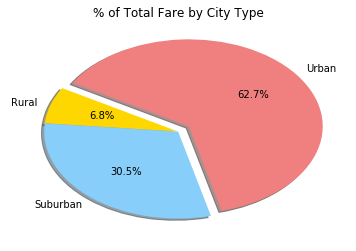

In [5]:
# Calculate Type Percents
city_type = data.groupby("type")
total = city_type.fare.sum().sum()
total_fare = (city_type.fare.sum()/total)*100

# Build Pie Chart
plt.pie(total_fare,labels =total_fare.index, colors=["Gold", "LightSkyBlue","LightCoral"],autopct="%1.1f%%",startangle=150,shadow = True,explode = (0, 0, 0.1))
plt.title("% of Total Fare by City Type")

# Save Figure
plt.savefig("images/Total_Fare_By_City_Type.png")

In [6]:
plt.show()

## Total Rides by City Type

Text(0.5,1,'% of Total Rides by City Type')

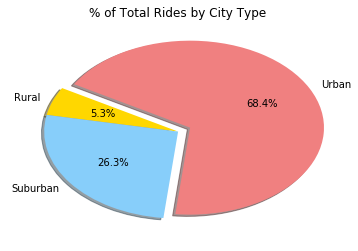

In [205]:
# Calculate Ride Percents
city_type = data.groupby("type")
total = city_type.ride_id.count().sum()
total_fare = (city_type.ride_id.count()/total)*100

# Build Pie Chart
plt.pie(total_fare,labels =total_fare.index, colors=["Gold", "LightSkyBlue","LightCoral"],autopct="%1.1f%%",startangle=150,shadow = True,explode = (0, 0, 0.1))
plt.title("% of Total Rides by City Type")
# Save Figure
plt.savefig("images/Total_Rides_By_City_Type.png")

In [204]:
# Show Figure
plt.show()

## Total Drivers by City Type

In [202]:
# Calculate Driver Percents

city_type = data.drop_duplicates(subset=['city', 'type'])
city_type = city_type.groupby("type")
total = city_type.driver_count.sum().sum()
total_drivers = (city_type.driver_count.sum()/total)*100

# Build Pie Charts
plt.pie(total_drivers,labels =total_drivers.index, colors=["Gold", "LightSkyBlue","LightCoral"],autopct="%1.1f%%",startangle=150,shadow = True,explode = (0, 0, 0.1))
plt.title("% of Total Drivers by City Type")

# Save Figure
plt.savefig("images/Total_Drivers_By_City_Type.png")

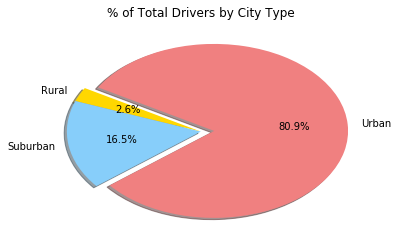

In [201]:
# Show Figure
plt.show()